In [1]:
import os
import pandas as pd

In [2]:
crema_data=[]
crema_labels=[]
for dirname, _, filenames in os.walk('/kaggle/input/speech-emotion-recognition-en/Crema'):
    for filename in filenames:
        crema_data.append(os.path.join(dirname, filename))
        str=os.path.join(dirname, filename)
        str=str.split('_')
        crema_labels.append(str[2])
crema_df = pd.DataFrame({'file_name':crema_data,'emotion':crema_labels})
crema_df.emotion = crema_df.emotion.replace({'DIS':'disgust','HAP':'happy','SAD':'sad','FEA':'fear',"ANG":'angry','NEU':'neutral'})
crema_df.emotion.value_counts()

emotion
disgust    1271
happy      1271
sad        1271
fear       1271
angry      1271
neutral    1087
Name: count, dtype: int64

In [3]:
import numpy as np
import pandas as pd
import os

In [4]:
import re

In [5]:
rev_data=[]
rev_labels=[]
for dirname, _, filenames in os.walk('/kaggle/input/speech-emotion-recognition-en/Ravdess/audio_speech_actors_01-24'):
    for filename in filenames:
        rev_data.append(os.path.join(dirname, filename))
        str=os.path.join(dirname, filename)
        str=str.partition('.wav')[0].split('-')
        str=int(str[6])
        rev_labels.append(str)
rev_df = pd.DataFrame({'file_name':rev_data,'emotion':rev_labels})
rev_df.emotion = rev_df.emotion.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
rev_df.emotion.value_counts()

emotion
neutral     288
surprise    192
disgust     192
fear        192
sad         192
happy       192
angry       192
Name: count, dtype: int64

In [6]:
savee_data=[]
savee_labels=[]
for dirname, _, filenames in os.walk('/kaggle/input/speech-emotion-recognition-en/Savee'):
    for filename in filenames:
        savee_data.append(os.path.join(dirname, filename))
        str=os.path.join(dirname, filename)
        str=str.split('_')[1]
        str=str.split('.')[0]
        match=re.match(r'^[a-zA-Z]+',str)
        str=match.group(0)
        savee_labels.append(str)
savee_df = pd.DataFrame({'file_name':savee_data,'emotion':savee_labels})
savee_df.emotion = savee_df.emotion.replace({'n':'neutral', 'h':'happy', 'f':'fear', 'd':'disgust', 'a':'angry', 'su':'surprise', 'sa':'sad'})
savee_df.emotion.value_counts()

emotion
neutral     120
fear         60
happy        60
disgust      60
angry        60
surprise     60
sad          60
Name: count, dtype: int64

In [7]:
tess_data=[]
tess_labels=[]
for dirname, _, filenames in os.walk('/kaggle/input/speech-emotion-recognition-en/Tess'):
    for filename in filenames:
        tess_data.append(os.path.join(dirname, filename))
        str=os.path.join(dirname, filename)
        str=str.split('_')[1]
        str=str.split('/')[0]
        str=str.lower()
        tess_labels.append(str)
tess_df=pd.DataFrame({'file_name':tess_data,'emotion':tess_labels})
tess_df['emotion'] = tess_df['emotion'].replace({'pleasant': 'surprise'})
tess_df['emotion'].value_counts()

emotion
fear        400
angry       400
disgust     400
neutral     400
sad         400
surprise    400
happy       400
Name: count, dtype: int64

In [8]:
combined_df_list = [crema_df,rev_df,savee_df,tess_df]
df = pd.concat(combined_df_list)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df.head()

,file_name,emotion
0,/kaggle/input/speech-emotion-recognition-en/Cr...,disgust
1,/kaggle/input/speech-emotion-recognition-en/Cr...,happy
2,/kaggle/input/speech-emotion-recognition-en/Cr...,happy
3,/kaggle/input/speech-emotion-recognition-en/Cr...,disgust
4,/kaggle/input/speech-emotion-recognition-en/Cr...,disgust


In [11]:
df.emotion.value_counts()

emotion
disgust     1923
happy       1923
sad         1923
fear        1923
angry       1923
neutral     1895
surprise     652
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
em = labelencoder.fit_transform(df.emotion)

<Axes: xlabel='emotion', ylabel='count'>

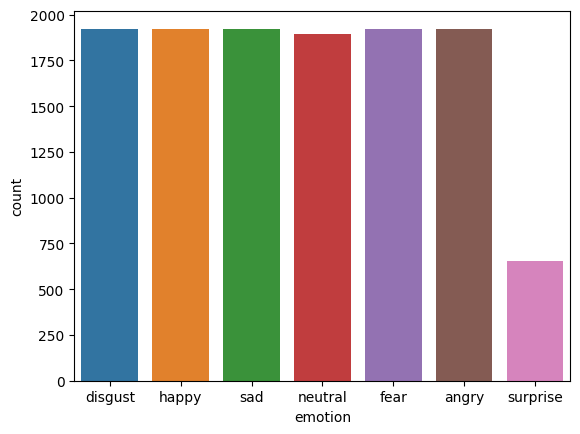

In [13]:
em = np.array(em)
sns.countplot(data=df,x=df.emotion)

In [14]:
import librosa
import librosa.display
from IPython.display import Audio

## stft -- Short Term Fourier Transform

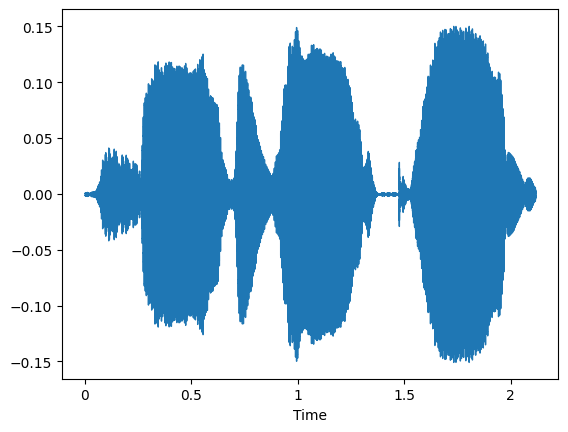

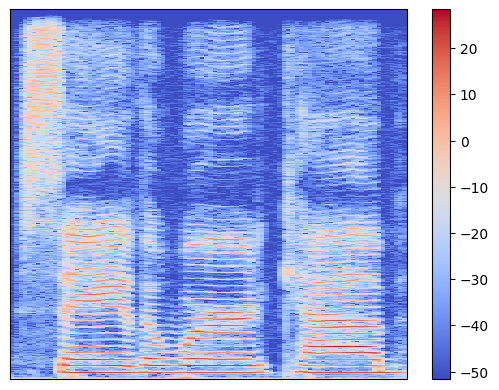

In [15]:
audio_file_path="/kaggle/input/speech-emotion-recognition-en/Tess/YAF_neutral/YAF_cab_neutral.wav"
audio,sampling_rate  = librosa.load(audio_file_path)
librosa.display.waveshow(audio,sr = sampling_rate)
plt.show()

x=librosa.stft(audio)
xdb=librosa.amplitude_to_db(abs(x))
librosa.display.specshow(xdb,sr=sampling_rate)
plt.colorbar()

Audio(audio_file_path)

> ## Mel Frequency Cepstral Co-efficients -mfcc

In [16]:
df.emotion.value_counts()

emotion
disgust     1923
happy       1923
sad         1923
fear        1923
angry       1923
neutral     1895
surprise     652
Name: count, dtype: int64

In [17]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc
xmfcc = df['file_name'].apply(lambda x: extract_mfcc(x))

In [18]:
xmfcc=np.array(xmfcc.tolist())
xmfcc.shape
x= np.expand_dims(xmfcc, axis = -1)
x.shape

(12162, 40, 1)

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

2024-07-18 12:32:43.452924: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-18 12:32:43.453036: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-18 12:32:43.585921: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(df[['emotion']])

In [50]:
y = to_categorical(y, num_classes=7)

## MODEL BUILDING

In [51]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,BatchNormalization,LSTM

In [52]:
def create_model(input_shape, num_classes):
    model = Sequential([
        LSTM(256, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        LSTM(128),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(7, activation='softmax')
    ])
    return model

input_shape = (40, 1)  # Adjust based on feature extraction
model = create_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
model.fit(x,y,batch_size=128,validation_split=0.1,epochs=50)

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.2620 - loss: 1.7746 - val_accuracy: 0.3435 - val_loss: 1.9576
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3780 - loss: 1.5298 - val_accuracy: 0.1857 - val_loss: 2.2851
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4232 - loss: 1.4268 - val_accuracy: 0.2802 - val_loss: 3.4717
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4388 - loss: 1.3879 - val_accuracy: 0.1956 - val_loss: 2.7244
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4564 - loss: 1.3539 - val_accuracy: 0.3057 - val_loss: 3.5088
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4672 - loss: 1.3144 - val_accuracy: 0.2219 - val_loss: 3.7689
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4768 - loss: 1.3067 - val_accuracy: 0.1824 - val_loss: 3.9328
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4726 - loss: 1.2949 - val_accuracy: 0.2243 - v

In [60]:
import numpy as np
import librosa
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Define the function to extract MFCC features
def extract_mfcc(audio_data, sample_rate):
    mfccs = np.mean(librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40).T, axis=0)
    return mfccs

# Define the emotion mapping function based on the number of classes
def get_emotion(prediction):
    emotion_map = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprise"}  # Adjust based on your labels
    max_index = np.argmax(prediction)
    return emotion_map.get(max_index, "Unknown")

# Function to display emotion
def display_emotion(emotion, time_point):
    clear_output(wait=True)
    plt.figure(figsize=(10, 2))
    plt.text(0.5, 0.5, f"Current Emotion: {emotion}\nTime: {time_point:.2f} seconds", 
             horizontalalignment='center', verticalalignment='center', fontsize=20)
    plt.axis('off')
    plt.show()

# Process audio file dynamically
def process_audio_file_dynamically(model, file_path, chunk_duration=1, sample_rate=22050):
    print(f"Processing file: {file_path}")
    
    # Load the audio file
    audio_data, sr = librosa.load(file_path, sr=sample_rate)
    
    # Calculate the number of samples per chunk
    chunk_samples = int(chunk_duration * sr)
    
    # Process the audio in chunks
    for i in range(0, len(audio_data), chunk_samples):
        chunk = audio_data[i:i + chunk_samples]
        
        # If the chunk is too short, pad it
        if len(chunk) < chunk_samples:
            chunk = np.pad(chunk, (0, chunk_samples - len(chunk)))
        
        mfcc_features = extract_mfcc(chunk, sr)
        mfcc_features = mfcc_features.reshape(1, 40, 1)  # Reshape for the model
        prediction = model.predict(mfcc_features)
        emotion = get_emotion(prediction[0])
        
        time_point = i / sr
        display_emotion(emotion, time_point)
        
        # Simulate the time it takes to play this audio chunk
        time.sleep(chunk_duration)


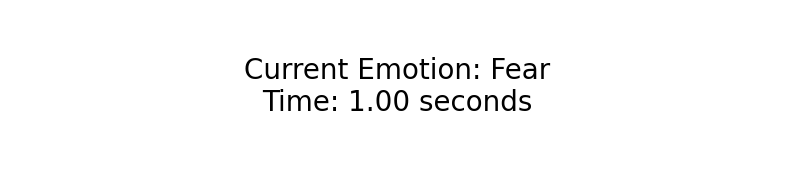

In [62]:
# Start processing a single audio file
audio_file_path = '/kaggle/input/speech-emotion-recognition-en/Tess/OAF_angry/OAF_beg_angry.wav'
process_audio_file_dynamically(model, audio_file_path)